In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [ ]:
# Load the questionnaire data
questionnaire_df = pd.read_excel('data/questionnaire_data-561422-2025-11-11-1622.xlsx')
# Filter out columns containing "$"
filtered_columns = [col for col in questionnaire_df.columns if '$' not in col and col != 'Participant number']
# Display column names
# print("Column names:")
# print(list(questionnaire_df.columns))
# print(questionnaire_df.columns)

/home/michaelt/.cache/pypoetry/virtualenvs/in9060-as2-Pf7P2CoS-py3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
# split into tasks, though we may want to be specific about this
# task_one_columns = filtered_columns[0:24]
# task_two_columns = filtered_columns[0:4] + filtered_columns[24:]
task_one_columns = filtered_columns[4:24]
task_two_columns = filtered_columns[24:]

# task_one_df = pd.DataFrame(questionnaire_df[filtered_columns])
# task_two_df = pd.DataFrame(questionnaire_df[filtered_columns])
task_one_df = questionnaire_df[task_one_columns]
task_two_df = questionnaire_df[task_two_columns]



# Calculate mean and variance for the filtered columns
# stats_df = pd.DataFrame({
#     'Mean': questionnaire_df[filtered_columns].mean(numeric_only=True),
#     'Variance': questionnaire_df[filtered_columns].var(numeric_only=True)
# })

# print(stats_df)

In [4]:
# Example usage mapping questionnaire numeric columns as conditional distributions
numeric_cols = [c for c in questionnaire_df.columns if questionnaire_df[c].dtype.kind in 'if' and '$' not in c]
# Limit to first 4 for clarity
example_arrays = [questionnaire_df[c].dropna().values for c in [numeric_cols[i] for i in [9, 13, 17, 21]]]

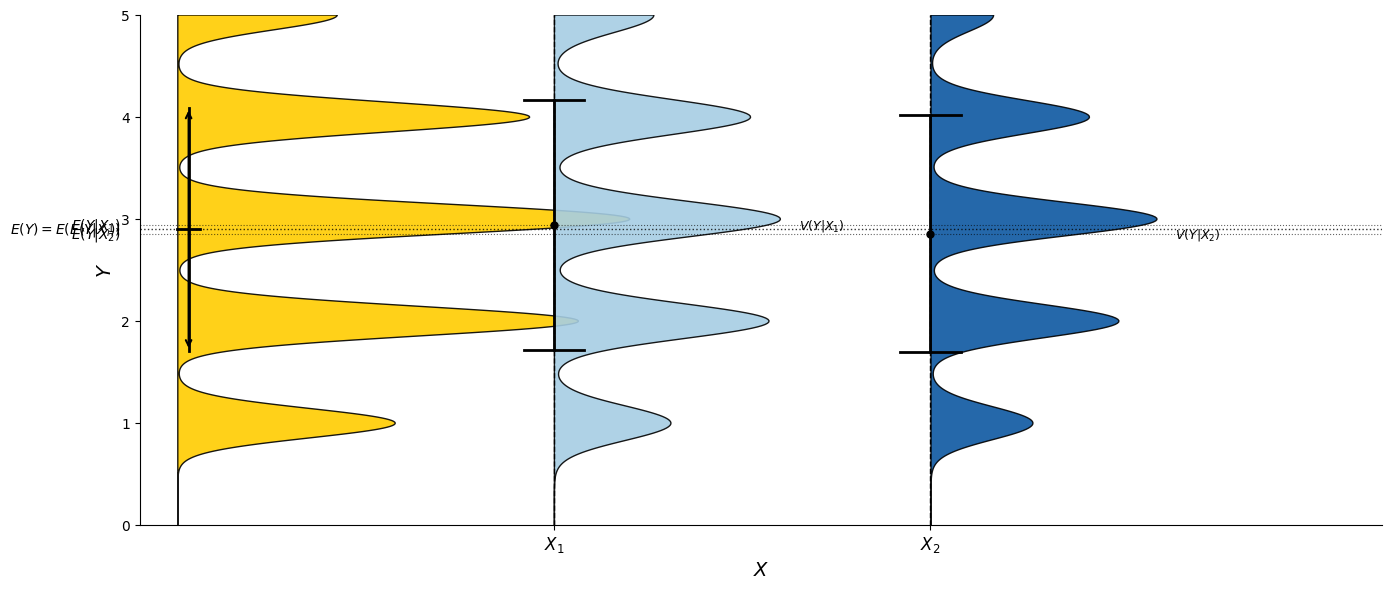

In [27]:
import fig.variance_plot as vp
# fig2, ax2 = vp.variance_decomposition_plot(example_arrays, bandwidth_adjust=0.5)
fig2, ax2 = vp.variance_decomposition_plot([task_one_df,task_two_df], bandwidth_adjust=0.5)
plt.show()